<a href="https://colab.research.google.com/github/robsongrego/Pos_graduacao_puc/blob/main/Projeto_mvp_ml_and_analytics_PUC_aluno_Robson_Barbosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machile Learning - Classificação

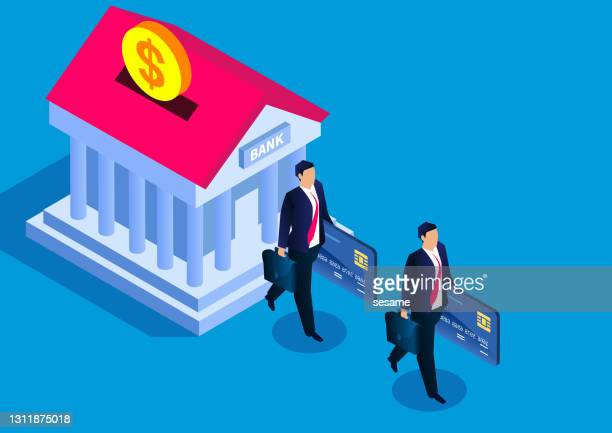

## Entenda o caso


A retenção de clientes tornou-se um grande problema para as instituições financeiras no atual setor bancário implacável. A rotatividade de clientes, o fenômeno em que os clientes mudam de banco, tem um grande impacto na lucratividade, na participação de mercado e na viabilidade de longo prazo dos bancos. Para os bancos que buscam reduzir as taxas de rotatividade e aprimorar as táticas de retenção de clientes, tornou-se fundamental entender as causas subjacentes da rotatividade de clientes e desenvolver modelos preditivos eficientes para identificar clientes em risco.

O objetivo deste projeto é analisar o churn de clientes bancários e investigar os principais fatores por trás dele. Nós nos esforçamos para obter informações sobre os motivos que afetam as decisões dos consumidores de deixar seu banco atual, observando uma variedade de aspectos, incluindo dados demográficos do cliente, comportamento bancário e fatores relacionados ao serviço. Além disso, exploraremos a viabilidade de métodos de modelagem preditiva para prever a rotatividade de clientes e criar um modelo de previsão preciso para detecção precoce de prováveis ​​rotatividade.

Ao nos aprofundarmos nesse assunto, aspiramos fornecer recomendações valiosas que podem capacitar os bancos a reter seus clientes de forma proativa e promover relacionamentos de longo prazo em um cenário financeiro em constante evolução.



##  Sobre os dados

O conjunto de dados contém informações abrangentes sobre a demografia dos clientes, ou seja, Idade, Localização e Sexo. As variáveis ​​presentes nos dados incluem, Creditscore (a pontuação representa o resumo do histórico de crédito de um cliente do banco e indica a probabilidade de reembolsar os fundos emprestados), Tenure (isso mostra há quanto tempo um cliente está no banco), Balance (o valor que um cliente tem em sua conta), NumOfProducts (o número de produtos que um cliente do banco comprou através do banco), HasCrCard (indica se o cliente tem cartão de crédito ou não), IsActiveMember (informa se um cliente está ativo), EstimatedSalary (representa s o salário estimado dos clientes do banco), Churned (mostra se um cliente foi churned ou não), Reclamar (informar se um cliente fez uma reclamação), Satisfaction Score (mostra o quão satisfeito um cliente está com o serviço do banco), Card type (indica o tipo de cartão do cliente do banco), Point Earned (É o número de pontos acumulados por um cliente com base em suas atividades bancárias ou uso). Esses dados podem ajudar a esclarecer os fatores que impulsionam a rotatividade de clientes do banco e apresentar abordagens práticas para prever o comportamento da rotatividade.

O conjunto de dados usado na análise deste projeto é armazenado em um arquivo CSV, obtido do Kaggle e de propriedade de Dhoni (Autor) e Radheshyam Kollipara (Colaborador). Com base no cálculo de usabilidade do Kaggle, os dados são completos, confiáveis ​​e licenciados. Os dados foram atualizados há dois meses e estão com 100% de usabilidade.



### Preparação dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import norm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def munge(path):
    # Read CSV file
    df=pd.read_csv(path, sep = ',')
    # Drop 'RowNumber'
    df.drop(columns=["RowNumber"], inplace=True)
    # Rename 'Geography' as Country and 'Exited'as Churned
    df.rename(columns={"Geography":"Country", "Exited":"Churned"}, inplace=True)
    # Cast 'CustomerId' as an object
    df["CustomerId"]=df["CustomerId"].astype(str)
    return df

In [ ]:
df = munge(r'https://raw.githubusercontent.com/robsongrego/Pos_graduacao_puc/main/Customer-Churn-Records.csv')

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
#target = df['Churned'] # atribuindo a target
#df['Churned target'] = target # criando uma nova coluna target

In [ ]:
#sem duplicados
df.duplicated().sum()

0

In [ ]:
# sem nulos
df.isna().sum()

CustomerId            0
Surname               0
CreditScore           0
Country               0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Churned               0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:


df.drop( 'CustomerId', axis=1, inplace=True)



In [ ]:
df.head()

,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
#As informações acima mostram que o conjunto de dados não possui valores ausentes e duplicados. Em grande medida, os dados não são confusos.

## Conhecendo o data set

In [ ]:
df.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Complain,Satisfaction Score,Point Earned
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.0,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2,0.2,3.01,606.52
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4,0.4,1.41,225.92
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0,0.0,1.00,119.00
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0,0.0,2.00,410.00
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0,0.0,3.00,605.00
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0,0.0,4.00,801.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0,1.0,5.00,1000.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surname             10000 non-null  object 
 1   CreditScore         10000 non-null  int64  
 2   Country             10000 non-null  object 
 3   Gender              10000 non-null  object 
 4   Age                 10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Balance             10000 non-null  float64
 7   NumOfProducts       10000 non-null  int64  
 8   HasCrCard           10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Churned             10000 non-null  int64  
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  object 
 15  Point Earned        10000 non-null  int64  
dtypes: fl

In [ ]:
# df['Country'] = df['Country'].astype('category') # transformando essa e as duas colunas abaixo em variaveis categóricas
# df['Gender'] = df['Gender'].astype('category')
# df['Card Type'] = df['Card Type'].astype('category')


In [ ]:
df.shape

(10000, 16)

Por algumas colunas (variáveis) serem categóricas , como o país , gênero e tipo de cartão , foi necessário aplicar o one hot encoding. Como o nosso modelo apenas lê números é necessário transformar informações categóricas em números binários.

Definição:
O One-Hot Encoding é uma técnica de transformação de dados categóricos em uma representação numérica binária. Cada categoria é convertida em um vetor binário onde todos os elementos são 0, exceto o elemento correspondente à categoria que é marcado como 1. Essa abordagem é amplamente utilizada para permitir que algoritmos de aprendizado de máquina processem dados categóricos de forma adequada, já que a maioria dos algoritmos requer dados numéricos para realizar suas operações.




In [ ]:
df = pd.get_dummies(data=df, columns=['Country' , 'Gender', 'Card Type'])
df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,...,Point Earned,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,...,464,1,0,0,1,0,1,0,0,0
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,...,456,0,0,1,1,0,1,0,0,0
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,...,377,1,0,0,1,0,1,0,0,0
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,...,350,1,0,0,1,0,0,1,0,0
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,...,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,...,300,1,0,0,0,1,1,0,0,0
9996,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,...,771,1,0,0,0,1,0,0,1,0
9997,Liu,709,36,7,0.00,1,0,1,42085.58,1,...,564,1,0,0,1,0,0,0,0,1
9998,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,...,339,0,1,0,0,1,0,1,0,0


Como ficou :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surname             10000 non-null  object 
 1   CreditScore         10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Churned             10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Point Earned        10000 non-null  int64  
 13  Country_France      10000 non-null  uint8  
 14  Country_Germany     10000 non-null  uint8  
 15  Country_Spain       10000 non-null  uint8  
 16  Gende

In [ ]:
target = df['Churned'] # atribuindo a coluna churned como nosso target
df['Churned target'] = target # criando uma nova coluna target para ir para o final do nosso dataframe
df = df.drop(['Churned', 'Surname'] , axis = 1) # excluindo a coluna target, pra movermos para o final

In [ ]:
df.shape

(10000, 21)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,...,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Churned target
0,619,42,2,0.00,1,1,1,101348.88,1,2,...,1,0,0,1,0,1,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,1,3,...,0,0,1,1,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,...,1,0,0,1,0,1,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,5,...,1,0,0,1,0,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,...,1,0,0,0,1,1,0,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,5,...,1,0,0,0,1,0,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,3,...,1,0,0,1,0,0,0,0,1,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,2,...,0,1,0,0,1,0,1,0,0,1


## Seleção de caracteristicas , Feauture_Selection

Utilizei dois tipos de feature selection apresentados nas aulas o Kbest e o extraTree


  KBest: O método KBest é uma técnica de seleção de recursos que seleciona os 'k' melhores recursos com base em alguma métrica de relevância, como a pontuação F ou o qui-quadrado. Ele classifica os recursos de acordo com sua importância em relação ao rótulo de saída e seleciona os 'k' principais recursos para uso em modelos de aprendizado de máquina.

  ExtraTrees: O método ExtraTrees (Árvores Extra Aleatórias) é uma técnica de seleção de recursos baseada em árvores de decisão. Ele cria várias árvores de decisão com divisões aleatórias e combina suas previsões para reduzir o viés de seleção de recursos. Ele atribui importâncias a cada recurso com base na média de sua importância em todas as árvores e seleciona os recursos mais importantes para a tarefa de classificação ou regressão.

In [ ]:
array = df.values
x = array[: , 0:-1]
y = array[: , -1]

In [ ]:
y

array([1., 0., 1., ..., 1., 1., 0.])

### SelectKbest

In [ ]:
from sqlalchemy.sql.selectable import Select
# SelectKbest

# Seleção de atributos pelo KBest
best_var = SelectKBest(score_func=f_classif , k = 10)

# executa a pontuação de x e y e obtem os atributos selecionados
fit = best_var.fit(x,y)

# reduz feature para os atributos selecionados
features = fit.transform(x)


print('\nNumero original de atributos : ', x.shape[1])
print('\nNumero reduzido de atributos : ', features.shape[1])


# exibir atributos originais
print('\nAtributos originais: ', df.columns[0:-1])

# exibe as pontuações de cada atributo e os 4 escolhidos ( com pontuações mais altas)


np.set_printoptions(precision = 3)# 3 casas decimais

print('\nScore dos atributos originais' , fit.scores_)
print('\nScore dos atributos selecionados' , best_var.get_feature_names_out(input_features=df.columns[0:-1]))




atributos_escolhidos_Kbest = best_var.get_feature_names_out(input_features=df.columns[0:-1])
atributos_escolhidos_Kbest



Numero original de atributos :  20

Numero reduzido de atributos :  10

Atributos originais:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Country_France', 'Country_Germany', 'Country_Spain',
       'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')

Score dos atributos originais [7.171e+00 8.859e+02 1.865e+00 1.426e+02 2.271e+01 4.866e-01 2.505e+02
 1.560e+00 1.153e+06 3.421e-01 2.142e-01 1.108e+02 3.096e+02 2.795e+01
 1.142e+02 1.142e+02 4.037e+00 2.559e+00 7.613e-04 1.470e-01]

Score dos atributos selecionados ['Age' 'Balance' 'NumOfProducts' 'IsActiveMember' 'Complain'
 'Country_France' 'Country_Germany' 'Country_Spain' 'Gender_Female'
 'Gender_Male']


array(['Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Complain',
       'Country_France', 'Country_Germany', 'Country_Spain',
       'Gender_Female', 'Gender_Male'], dtype=object)

### Extra Tree

In [ ]:


modelo = ExtraTreesClassifier(n_estimators = 100)
modelo.fit(x,y)


print('\nNumero original de atributos : ', x.shape[1])

print(df.columns[:-1])
# exibe a pontuanaçõ de importancia para cada atributo

print(modelo.feature_importances_)




Numero original de atributos :  10
Index(['Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Complain',
       'Country_France', 'Country_Germany', 'Country_Spain', 'Gender_Female',
       'Gender_Male'],
      dtype='object')
[2.080e-02 7.805e-03 3.442e-02 9.125e-03 9.137e-01 7.982e-04 9.824e-03
 7.863e-04 1.233e-03 1.481e-03]


In [ ]:
# listadas as importancias
dic = {}
lista_atributos = df.columns[:-1]
pontuacao_atributos = modelo.feature_importances_
for posicao,atributo in enumerate(lista_atributos):
  dic[atributo] = pontuacao_atributos[posicao]
  #print(atributo)
dic

{'CreditScore': 0.0053242654853657935,
 'Age': 0.03155809871159833,
 'Tenure': 0.00465416022786734,
 'Balance': 0.009935663484448872,
 'NumOfProducts': 0.045651270091381015,
 'HasCrCard': 0.0020258126150361887,
 'IsActiveMember': 0.01325160666133992,
 'EstimatedSalary': 0.005381145664173569,
 'Complain': 0.844285893485507,
 'Satisfaction Score': 0.004003709384941081,
 'Point Earned': 0.005263807166126197,
 'Country_France': 0.002855298007752392,
 'Country_Germany': 0.012374173562238223,
 'Country_Spain': 0.0015484426885306612,
 'Gender_Female': 0.0029282324517693665,
 'Gender_Male': 0.003616636827231243,
 'Card Type_DIAMOND': 0.0014904453983669744,
 'Card Type_GOLD': 0.0012367670148692987,
 'Card Type_PLATINUM': 0.0012717084940305102,
 'Card Type_SILVER': 0.0013428625774260536}

In [ ]:
atributos_escolhidos_extraTree = sorted(dic, key = dic.get, reverse=True)[:10]

print("Chaves com os 10 maiores valores:")
for chave in atributos_escolhidos_extraTree:
    print(chave , dic[chave])

atributos_escolhidos_extraTree

Chaves com os 10 maiores valores:
Complain 0.844285893485507
NumOfProducts 0.045651270091381015
Age 0.03155809871159833
IsActiveMember 0.01325160666133992
Country_Germany 0.012374173562238223
Balance 0.009935663484448872
EstimatedSalary 0.005381145664173569
CreditScore 0.0053242654853657935
Point Earned 0.005263807166126197
Tenure 0.00465416022786734


['Complain',
 'NumOfProducts',
 'Age',
 'IsActiveMember',
 'Country_Germany',
 'Balance',
 'EstimatedSalary',
 'CreditScore',
 'Point Earned',
 'Tenure']

### Escolher os atributos selecionados com mais importância

 Visto que entendo ser necessário a inclusão dos países no Dataset, que a  evasão do cliente pode ser explicado por aspecto cultural de cada país, como o aspecto comportamental. E também é necessário utilizar os dois gêneros para termos todos os clientes. Obtei por selecionar o método de seleção de características KBest.




Ficando assim mais reduzido o dataset e diminuindo a complexidade do estudo.

In [ ]:
atributos_escolhidos_Kbest = list(atributos_escolhidos_Kbest)
atributos_escolhidos_Kbest.append(df.columns[-1])
atributos_escolhidos_Kbest

['Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'Complain',
 'Country_France',
 'Country_Germany',
 'Country_Spain',
 'Gender_Female',
 'Gender_Male',
 'Churned target']

In [ ]:
df = df [atributos_escolhidos_Kbest]

In [ ]:
# df = df[['Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Complain',
#        'Country_France', 'Country_Germany', 'Country_Spain',
#        'Gender_Female', 'Gender_Male','Churned target']]

In [ ]:
df.head()

,Age,Balance,NumOfProducts,IsActiveMember,Complain,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male,Churned target
0,42,0.00,1,1,1,1,0,0,1,0,1
1,41,83807.86,1,1,1,0,0,1,1,0,0
2,42,159660.80,3,0,1,1,0,0,1,0,1
3,39,0.00,2,0,0,1,0,0,1,0,0
4,43,125510.82,1,1,0,0,0,1,1,0,0


## Exibição de gráficos para entendimento da distribuição

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,...,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Churned target
0,619,42,2,0.00,1,1,1,101348.88,1,2,...,1,0,0,1,0,1,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,1,3,...,0,0,1,1,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,...,1,0,0,1,0,1,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,5,...,1,0,0,1,0,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,...,0,0,1,1,0,0,1,0,0,0


In [ ]:
max(df.groupby('Age').count()['Churned target']  )  # o máximo de pessoas de determinada idade que se evadiram do banco

478

### Distruibuição por idade

<Axes: xlabel='Age'>

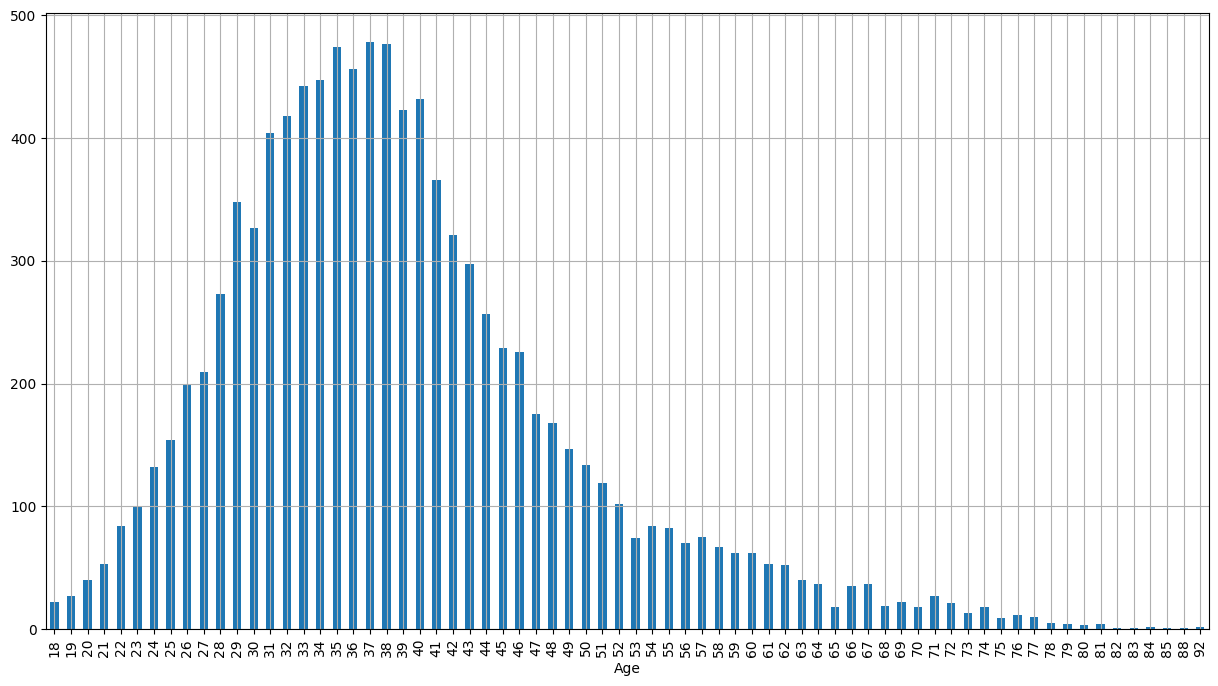

In [ ]:
# Este gráfico nos nostra a distribuição por idades de clientes que se evadiram

df.groupby('Age').count()['Churned target'].plot(kind= 'bar', figsize = (15,8) ,grid = True)

In [ ]:
import plotly.express as px
# Este gráfico nos nostra a distribuição por idades de clientes que se evadiram
fig = px.histogram(df, x="Age", color_discrete_sequence=["goldenrod"])
fig.update_layout(title_text="Distribuição de idade do cliente bancário", bargap=0.3, xaxis_title_text="Age", yaxis_title_text="Count")
fig.show()


# aqui temos que a idade mais provável para mudança de banco é 37 anos

## Split dados

Em seguida, vamos realizar a separação do dataset nas bases de treino e teste, com o método holdout:

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória


#seperação em conjunto de teste e treino

array = df.values
x = array[: , 0:-1]
y = array[: , -1]

x_train , x_test , y_train , y_test = train_test_split(x,y,
                                                       test_size = test_size , shuffle = True ,
                                                       random_state= seed , stratify=y) # holdout com estratificação

# parametros e partições de validação cruzada

scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes , shuffle = True , random_state = seed)


## Inferência dos modelos

##### Iniciaremos agora a etapa de modelagem e inferência, mas não sabemos de antemão quais algoritmos performarão bem nesse conjunto de dados. Assim, usaremos a validação cruzada para treinar e avaliar os modelos usando a métrica acurácia. Primeiramente, iremos avaliar os algoritmos com a configuração padrão de hiperparâmetros da scikit-Learn:

In [ ]:
np.random.seed(7)


models = []

# criando modelos e os adicionando na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parametros para o Bagging Classifier

base = DecisionTreeClassifier()
num_trees = 100
max_features = 3


# criando os modelos para o voting classifier

bases = []
model1 = LogisticRegression(max_iter = 200)
bases.append(('Logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))


In [ ]:
# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []



LR: 0.796250 (0.000000)
KNN: 0.795125 (0.010208)
CART: 0.996375 (0.001179)
NB: 0.796750 (0.003800)
SVM: 0.796250 (0.000000)
Bagging: 0.998125 (0.001008)
RF: 0.998625 (0.000875)
ET: 0.998000 (0.001146)
Ada: 0.998625 (0.001038)
GB: 0.998500 (0.000935)
Voting: 0.796250 (0.000000)


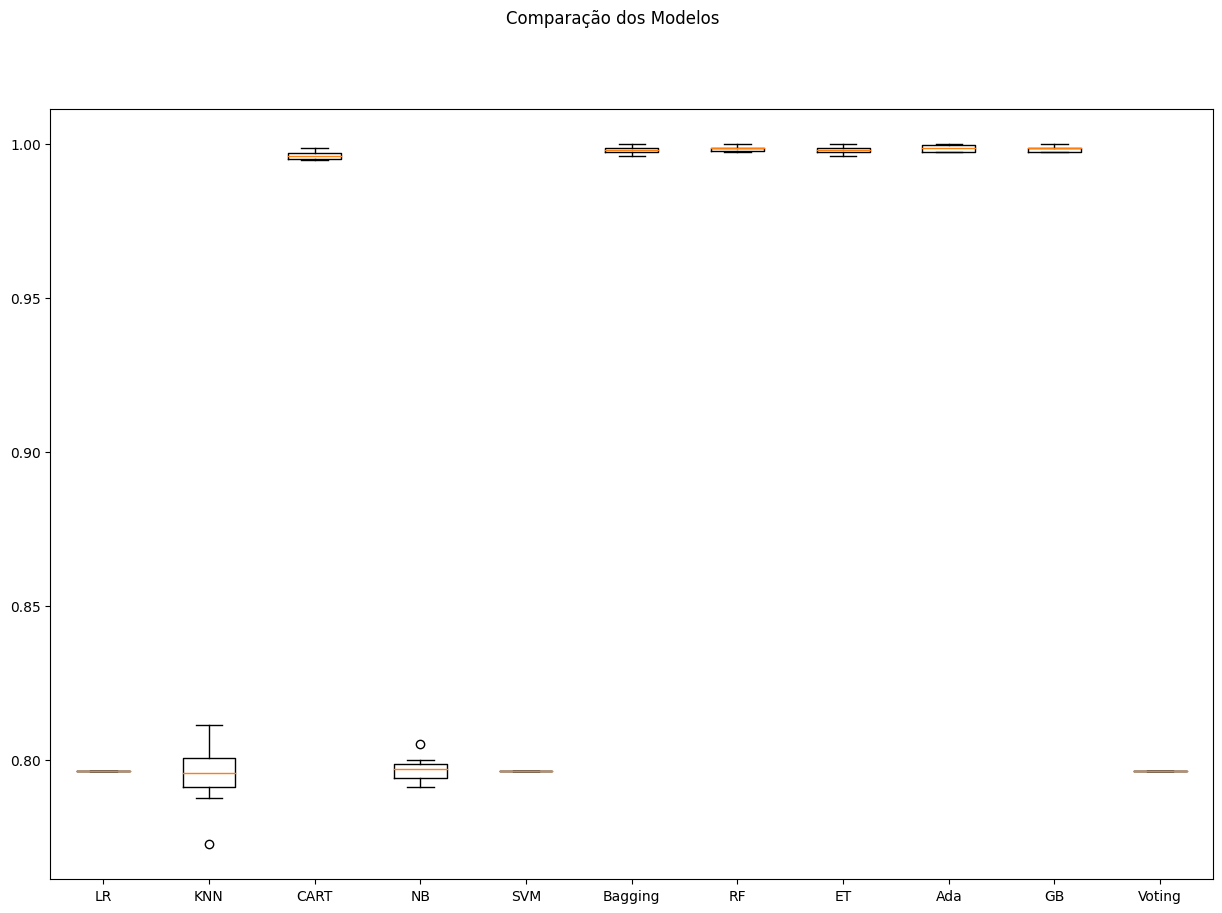

In [ ]:
# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Criando modelos de normalização


A normalização é de extrema importância na aprendizagem de máquina (ML) porque garante que as diferentes características (ou variáveis) dos dados estejam na mesma escala, permitindo que os algoritmos de ML tratem todas as características de forma igualitária. Isso evita que características com escalas muito diferentes dominem o processo de aprendizado, melhorando a estabilidade do modelo e facilitando a convergência durante o treinamento. A normalização também ajuda a melhorar o desempenho de muitos algoritmos, especialmente aqueles baseados em cálculos de distância, como K-Vizinhos Mais Próximos (K-NN) e Gradiente Descendente.

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))



Usar pipelines na aprendizagem de máquina é benéfico porque eles permitem automatizar e simplificar o fluxo de trabalho de pré-processamento e modelagem, garantindo maior eficiência e reprodutibilidade dos resultados. Além disso, os pipelines ajudam a evitar vazamento de dados (data leakage) ao encapsular todo o processo de pré-processamento dentro do pipeline. Isso significa que as etapas de pré-processamento, como normalização, transformação de dados ou codificação de variáveis, são aplicadas separadamente em cada conjunto de treinamento e teste, evitando que informações do conjunto de teste sejam usadas indevidamente para ajustar o modelo, o que poderia comprometer a generalização do mesmo. Em suma, os pipelines fornecem uma maneira organizada e segura de construir e executar fluxos de trabalho de aprendizagem de máquina.


LR-orig: 0.796 (0.000)
KNN-orig: 0.795 (0.010)
CART-orig: 0.996 (0.001)
NB-orig: 0.797 (0.004)
SVM-orig: 0.796 (0.000)
Bag-orig: 0.998 (0.001)
RF-orig: 0.999 (0.001)
ET-orig: 0.998 (0.001)
Ada-orig: 0.999 (0.001)
GB-orig: 0.998 (0.001)
Vot-orig: 0.796 (0.000)
LR-padr: 0.999 (0.001)
KNN-padr: 0.999 (0.001)
CART-padr: 0.997 (0.002)
NB-padr: 0.999 (0.001)
SVM-padr: 0.999 (0.001)
Bag-padr: 0.998 (0.001)
RF-padr: 0.999 (0.001)
ET-padr: 0.998 (0.001)
Ada-padr: 0.999 (0.001)
GB-padr: 0.998 (0.001)
Vot-padr: 0.999 (0.001)
LR-norm: 0.999 (0.001)
KNN-norm: 0.999 (0.001)
CART-norm: 0.996 (0.001)
NB-norm: 0.999 (0.001)
SVM-norm: 0.999 (0.001)
Bag-norm: 0.998 (0.001)
RF-norm: 0.999 (0.001)
ET-norm: 0.998 (0.001)
Ada-norm: 0.999 (0.001)
GB-norm: 0.998 (0.001)
Vot-norm: 0.999 (0.001)


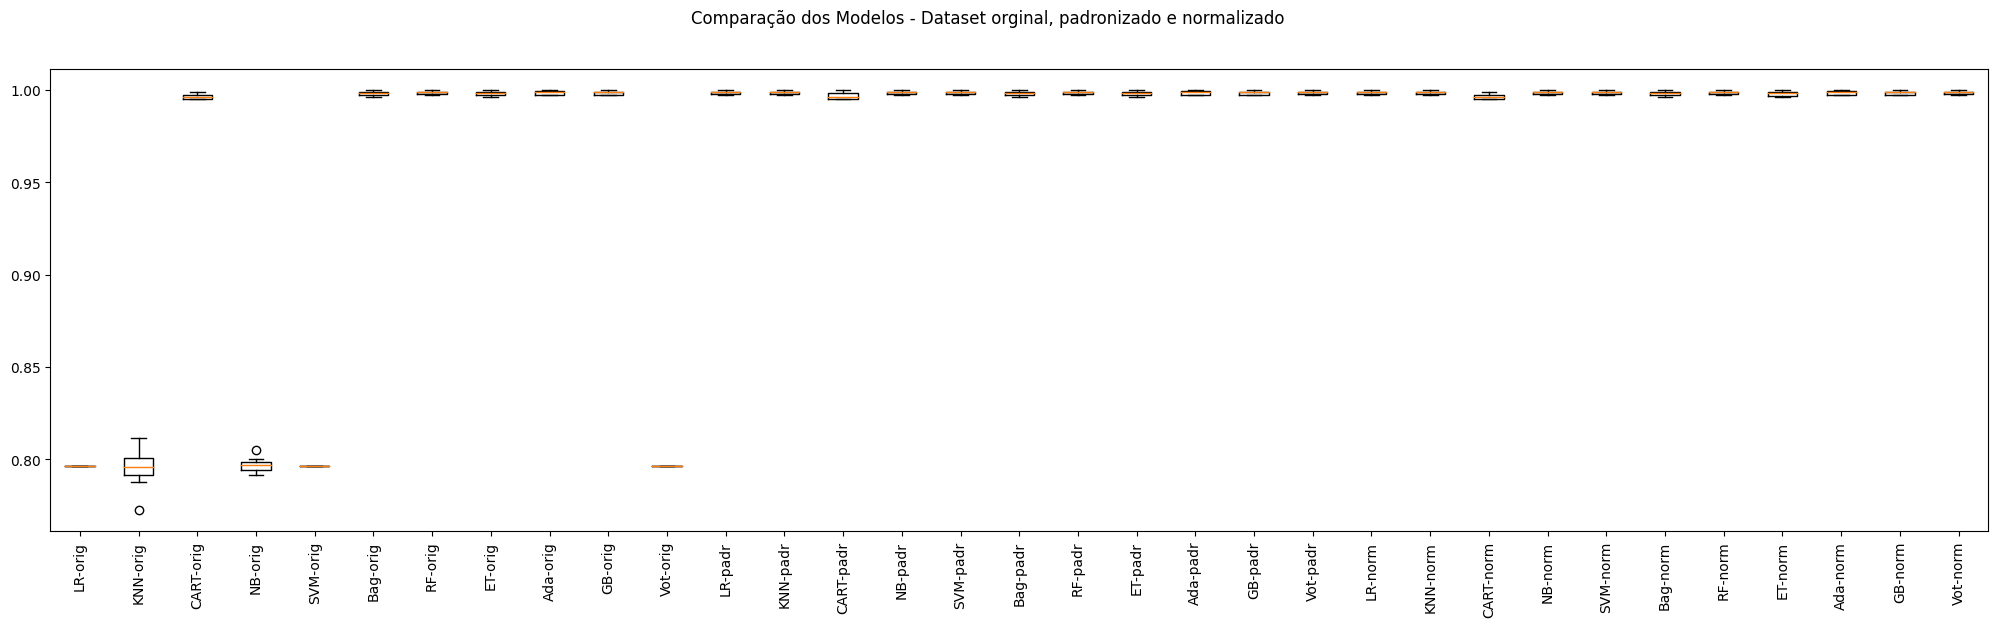

In [ ]:
# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Conclusão

É possível ver a evoluçao na acurácia dos algoritmos desde os originais até os padronizados e terminando nos normalizados

Com isso tivemos muitos algoritmos e essembles bem próximos do 100% de acurácia.Com pouquíssimo desvio padrão. Por se tratar de uma base de dados isso nos parece possível . Ao aumentar a base se  torna bem difícil disso acontecer.

Como escolha podemos utilizar o essemble ADA Boosting para classificar nosso modelo.



# DEEP LEARNING - PLN PROCESSING LANGUAGE NATURAL

## Tema


Este conjunto de dados (FinancialPhraseBank) contém os sentimentos para as manchetes de notícias financeiras da perspectiva de um investidor de varejo.


O sentimento de um investidor em varejo sobre uma notícia pode ter um papel significativo na economia. Vamos explorar como o sentimento positivo, neutro e negativo de um investidor pode influenciar diferentes aspectos da economia.

  * Sentimento Positivo:
  
  Quando um investidor em varejo reage positivamente a uma notícia econômica, ele tende a demonstrar confiança e otimismo no mercado. Esse otimismo pode levar a uma maior participação no mercado de ações e a um aumento no investimento em empresas e setores considerados promissores. O aumento no investimento pode impulsionar o crescimento econômico, resultando em maior criação de empregos e expansão dos negócios. Além disso, o sentimento positivo dos investidores pode atrair investimentos estrangeiros e fortalecer a moeda local.

  * Sentimento Neutro:

  Quando um investidor em varejo adota uma postura neutra em relação a uma notícia, ele pode adiar decisões de investimento significativas até obter mais informações ou uma clareza sobre o impacto da notícia na economia. Esse sentimento pode resultar em menor atividade de investimento no curto prazo, o que pode limitar as oscilações extremas do mercado. Por outro lado, pode haver uma tendência de conservadorismo nos gastos e investimentos, o que pode levar a um crescimento econômico mais moderado.

  * Sentimento Negativo:

  Quando um investidor em varejo reage negativamente a uma notícia econômica, pode haver um aumento na aversão ao risco e uma tendência de retirar investimentos do mercado. Esse sentimento pode resultar em uma queda nos mercados de ações, menor investimento em empresas e uma retração geral na economia. A falta de confiança dos investidores pode levar a uma desaceleração dos negócios, maior desemprego e até mesmo desaceleração econômica. Além disso, o sentimento negativo pode afetar a confiança dos consumidores, levando a uma redução nos gastos e no consumo, o que pode ter impactos em cascata na economia.

Em resumo, o sentimento de um investidor em varejo sobre uma notícia econômica pode influenciar a economia de várias maneiras, incluindo o nível de investimento, a criação de empregos, a atividade de negócios, a taxa de crescimento econômico e até mesmo a estabilidade dos mercados financeiros. É importante notar que os sentimentos dos investidores podem ser voláteis e sujeitos a mudanças rápidas, e a maneira como a economia reage depende de uma série de fatores complexos e interligados.

## Importações

In [1]:
!pip install transformers
!pip install simpletransformers "transformers==4.30.2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 26.1 MB/s eta 0:00:00
  

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re

## Dados

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/robsongrego/Pos_graduacao_puc/main/all-data.csv",encoding='ISO-8859-1')

In [28]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [29]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'statement'})

In [30]:
df.head()

,sentiment,statement
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## Pré processamento

### Lower

In [31]:
df['statement'] =df['statement'].str.lower()
df

,sentiment,statement
0,neutral,technopolis plans to develop in stages an area...
1,negative,the international electronic industry company ...
2,positive,with the new production plant the company woul...
3,positive,according to the company 's updated strategy f...
4,positive,financing of aspocomp 's growth aspocomp is ag...
...,...,...
4840,negative,london marketwatch -- share prices ended lower...
4841,neutral,rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,operating profit fell to eur 35.4 mn from eur ...
4843,negative,net sales of the paper segment decreased to eu...


### Retirando caracteres indesejandos

* mantendo conosco o cifrão e o percentual

In [34]:
def limpar_texto(texto):
  padrao = r"[^a-zA-Z0-9$% ]"
  return re.sub(padrao, " " , texto)




In [35]:
df["statement"] = df["statement"].apply(limpar_texto)

print(df)

     sentiment                                          statement
0      neutral  technopolis plans to develop in stages an area...
1     negative  the international electronic industry company ...
2     positive  with the new production plant the company woul...
3     positive  according to the company  s updated strategy f...
4     positive  financing of aspocomp  s growth aspocomp is ag...
...        ...                                                ...
4840  negative  london marketwatch    share prices ended lower...
4841   neutral  rinkuskiai  s beer sales fell by 6 5 per cent ...
4842  negative  operating profit fell to eur 35 4 mn from eur ...
4843  negative  net sales of the paper segment decreased to eu...
4844  negative  sales in finland decreased by 10 5 % in januar...

[4845 rows x 2 columns]


### Informações do nosso dataset

In [42]:
df.shape

(4837, 2)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [44]:
df.describe()

,sentiment,statement
count,4837,4837
unique,3,4837
top,neutral,technopolis plans to develop in stages an area...
freq,2871,1


In [45]:
df.duplicated().sum()  # soma dos dados duplicados

0

In [46]:
df.drop_duplicates(subset=['statement'],keep='first',inplace=True) # retirando dados duplicados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [80]:
df.isna().sum() # quantidade de nulos

sentiment    0
statement    0
dtype: int64

In [81]:
df.dropna(inplace=True) # dropando dados nulos

,sentiment,statement
0,neutral,technopolis plans to develop in stages an area...
1,negative,the international electronic industry company ...
2,positive,with the new production plant the company woul...
3,positive,according to the company s updated strategy f...
4,positive,financing of aspocomp s growth aspocomp is ag...
...,...,...
4840,negative,london marketwatch share prices ended lower...
4841,neutral,rinkuskiai s beer sales fell by 6 5 per cent ...
4842,negative,operating profit fell to eur 35 4 mn from eur ...
4843,negative,net sales of the paper segment decreased to eu...


In [47]:
df.describe() # descrição de nosso dataset agora

,sentiment,statement
count,4837,4837
unique,3,4837
top,neutral,technopolis plans to develop in stages an area...
freq,2871,1


### Conhecendo nossos dados

In [48]:
df['sentiment'].value_counts() # contagem

neutral     2871
positive    1362
negative     604
Name: sentiment, dtype: int64

<Axes: >

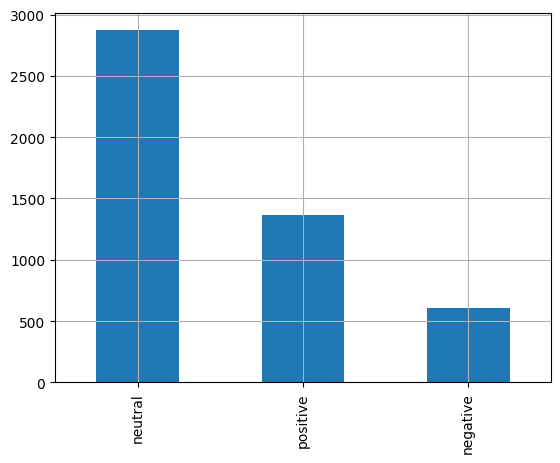

In [49]:
df['sentiment'].value_counts().plot(kind='bar', grid = True)

#### Palavras mais utilizadas em geral

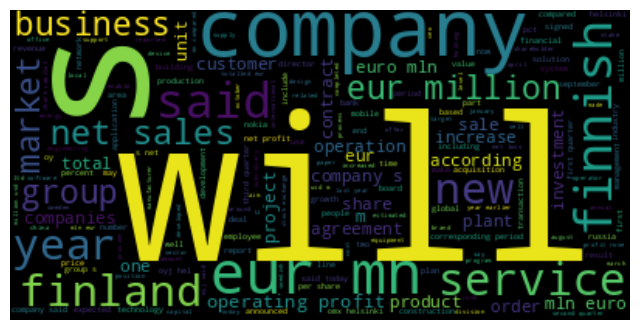

In [50]:

text = " ".join([x for x in df.statement])

wordcloud = WordCloud(background_color='black').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Palavras mais utilizadas para o sentimento neutro

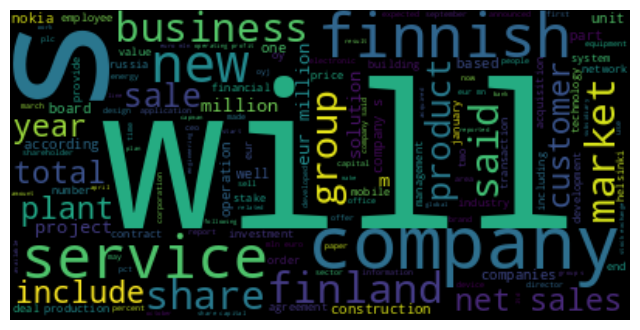

In [51]:
## for neutral

text = " ".join([x for x in df.statement[df.sentiment=='neutral']])

wordcloud = WordCloud(background_color='black').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


#### Palavras mais utilizadas para o sentimento positivo

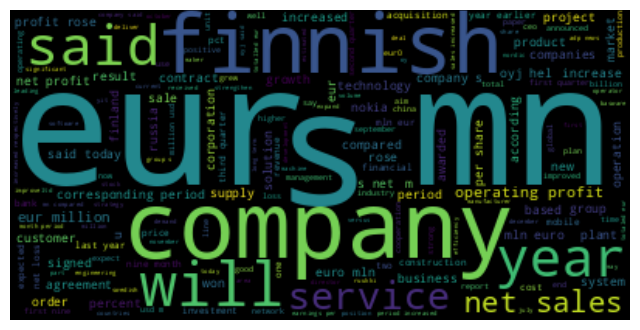

In [52]:
## for positive

text = " ".join([x for x in df.statement[df.sentiment=='positive']])

wordcloud = WordCloud(background_color='black').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Palavras mais utilizadas para o sentimento negativo

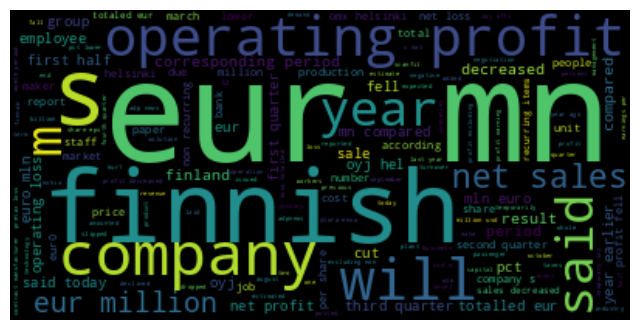

In [53]:

## for negative

text = " ".join([x for x in df.statement[df.sentiment=='negative']])

wordcloud = WordCloud(background_color='black').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


## Definição de parâmetros para teste e treino do dataframe

O código está criando um modelo de classificação de texto usando o BERT como modelo base, com 3 classes de saída, e configurações adicionais definidas para garantir o pré-processamento adequado dos dados. O modelo será executado na CPU, e a saída será sobrescrita se já existir na pasta de destino do modelo. Agora podemos usar esse modelo para treinar e realizar tarefas de classificação com seus dados de texto.

O BERT também possui um reprocessamento , incluindo tokenização ,
padding, truncamento, criação de mascaras de atenção entre outros tratamentos.

In [55]:
train,eva = train_test_split(df,test_size = 0.2)

In [56]:
from simpletransformers.classification import ClassificationModel

# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initi

#### Criando labels

In [57]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1

train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(3869, 3)


#### separando os dados para treino e evaluate

esta quantidade rodou em 30 minutos aqui no meu pc lento, acredito que em um melhor possa ter melhor desempenho .

In [58]:

train_df = pd.DataFrame({
    'text': train['statement'][:1500].replace(r'\n', ' ', regex=True),
    'label': train['label'][:1500]
})

eval_df = pd.DataFrame({
    'text': eva['statement'][-400:].replace(r'\n', ' ', regex=True),
    'label': eva['label'][-400:]
})



#### Treinamento

In [59]:
model.train_model(train_df)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/188 [00:00<?, ?it/s]

(188, 0.741027323885801)

In [75]:
eval_df.head()

,text,label
4751,operating profit totaled eur 6 7 mn down fro...,1
1330,sanoma also has an executive committee in ac...,2
4177,as a result it has started negotiations with...,2
1721,following last year s good profit developm...,0
1342,strategic and operational business information...,2


In [61]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

## Avaliação do modelo

In [63]:
result

{'mcc': 0.7138272769116224, 'eval_loss': 0.441504767537117}

In [64]:
model_outputs # saídas do modelo

array([[-0.38135543,  1.02740705, -1.73840678],
       [-0.21388333, -1.12019765,  2.60530019],
       [ 0.42160112, -1.3734678 ,  2.08234882],
       ...,
       [ 0.72720736,  0.30279753, -1.83023095],
       [ 0.63128179, -1.56531644,  2.08151913],
       [ 0.36681661, -1.37280583,  2.2092433 ]])

In [65]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))


In [66]:
true = eval_df['label'].tolist()
predicted = lst

##### Matriz confusão

In [67]:

import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 72,   5,  32],
       [  3,  42,  12],
       [ 11,   0, 223]])

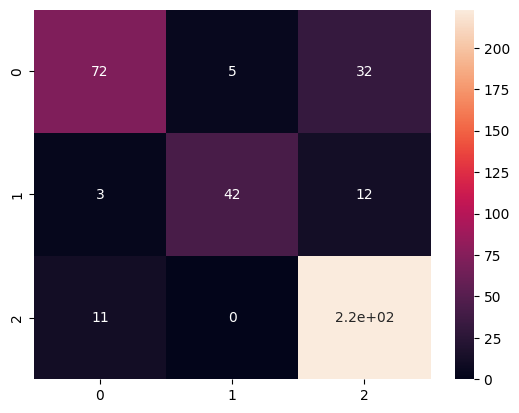

In [68]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True)
plt.show()

In [85]:
sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative'])

'              precision    recall  f1-score   support\n\n    positive       0.84      0.66      0.74       109\n     neutral       0.89      0.74      0.81        57\n    negative       0.84      0.95      0.89       234\n\n    accuracy                           0.84       400\n   macro avg       0.86      0.78      0.81       400\nweighted avg       0.84      0.84      0.84       400\n'

In [70]:
sklearn.metrics.accuracy_score(true,predicted)

0.8425

## Testes

In [71]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive',1:'negative',2:'neutral'}
    print(sentiment_dict[pos])
    return

Uma vez que criamos nosso modelo , vamos agora testar as declarações em um cenário positivo, negativo e neutro

In [72]:
## neutral statement
get_result("According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [73]:
## positive statement
get_result("According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [74]:
## negative statement
get_result('Sales in Finland decreased by 2.0 % , and international sales decreased by 9.3 % in terms of euros , and by 15.1 % in terms of local currencies .')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative
